## Get dependencies

In [53]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Import Data

In [54]:
census = pd.read_csv('../data/Census-Datensatz.csv', sep=';', header=0, encoding='utf-8')
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Prepare Data


In [55]:
# Create some dictionaries to map strings to numeric values:

# education can be picked from dataset
map_education_num = census[['education', 'education-num']].drop_duplicates()

#education_dict = map_education_num.to_dict();
education_dict = {}
for index, row in map_education_num.iterrows():
    education_dict[row['education']] = row['education-num']

# race has to be done manually
race_dict = {' Asian-Pac-Islander': 4, ' White': 3, ' Black': 2, ' Amer-Indian-Eskimo':1, ' Other': 0}

# define target, depending on income
target_dict = {' >50K': 100, ' <=50K': 0}

In [56]:
# Remove colums
to_pop = ["workclass", "fnlwgt", "education", "marital-status", "occupation", "relationship", "sex", "capital-gain", "capital-loss", "native-country", "race", "income"]

# convert race to race num
census["race-num"] = census["race"].replace(race_dict)

# define binary target
census["target"] = census["income"].replace(target_dict)


for col in to_pop:
    census.pop(col)

census.head(100)

,age,education-num,hours-per-week,race-num,target
0,39,13,40,3,0
1,50,13,13,3,0
2,38,9,40,3,0
3,53,7,40,2,0
4,28,13,40,2,0
...,...,...,...,...,...
95,29,10,50,3,0
96,48,16,60,3,100
97,37,10,48,3,100
98,48,12,40,3,0


# Create Linear regression with polynom

In [64]:

poly = PolynomialFeatures(degree=2, include_bias=True)
x = census[['age', 'education-num', 'hours-per-week']]

poly_x = poly.fit_transform(x)

poly_reg_model = LinearRegression()
poly_reg_model.fit(poly_x, census['target'])

y_predicted = poly_reg_model.predict(poly_x)

census['score'] = y_predicted

census.head(20)



rounded = []
more = []
less = []
for index, row in census.iterrows():
    score = row['score']
    rounded.append(round(score/10)*10)
    more.append(1 if row['target'] == 100 else 0)
    less.append(0 if row['target'] == 100 else 1)

cluster = {
    'rounded':rounded,
    'more':more,
    'less': less,
}

# Create DataFrame
cluster = pd.DataFrame(cluster)

cluster.head(20)
cluster_unique = cluster.groupby('rounded', as_index=False).agg({
    'more': 'sum',
    'less': 'sum'
})

cluster_unique.head(20)


,rounded,more,less
0,-50,0,1
1,-40,0,5
2,-30,0,13
3,-20,1,47
4,-10,4,1622
5,0,49,3800
6,10,455,5471
7,20,1118,5621
8,30,1970,4667
9,40,1181,1645


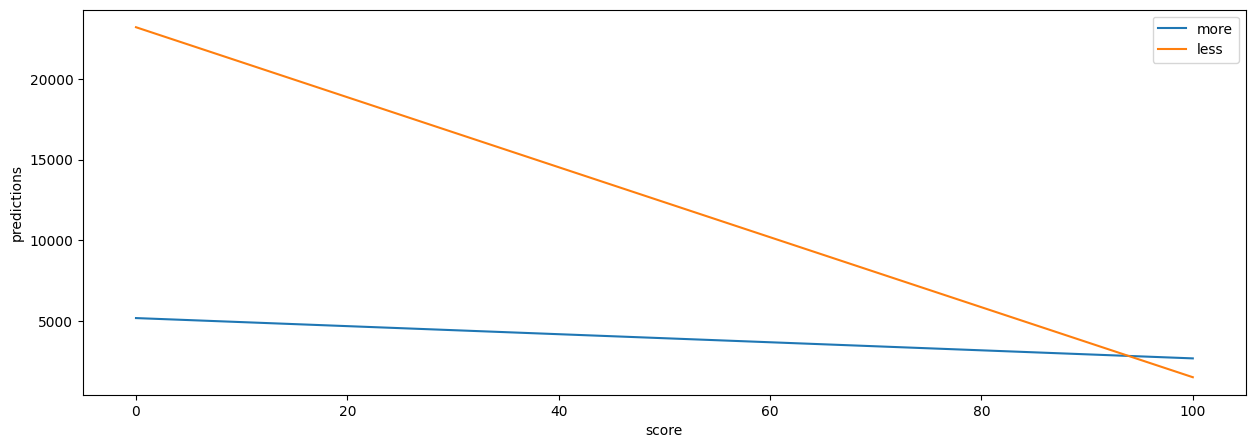

In [60]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.plot(cluster_unique['rounded'], cluster_unique['more'], label="more")
ax.plot(cluster_unique['rounded'], cluster_unique['less'], label="less")

ax.set_xlabel("score")
ax.set_ylabel("predictions")
ax.legend()